## Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-10, 10, 0.01)
g = 1 / (1+np.exp(-z))

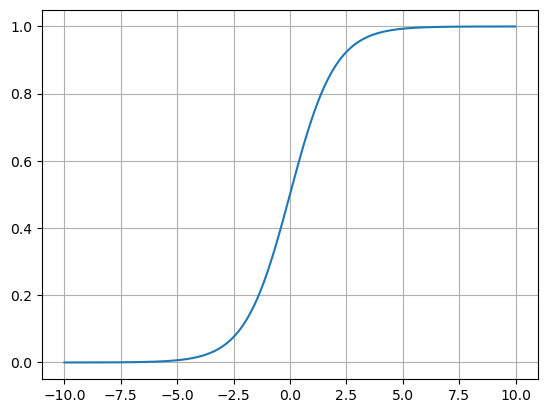

In [2]:
plt.plot(z, g)
plt.grid()
plt.show()

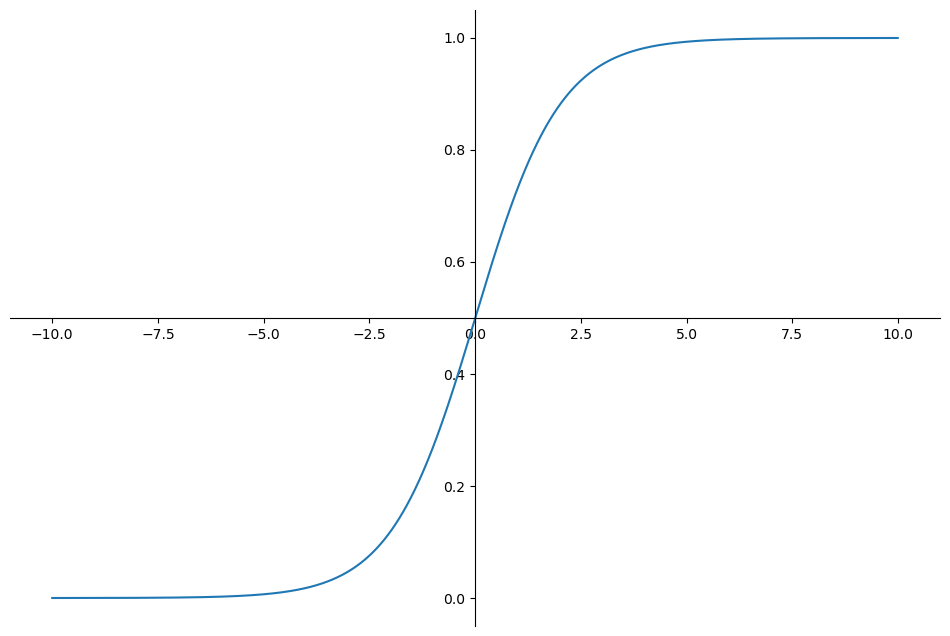

In [3]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z, g)
ax.spines['left'].set_position('zero')     # 좌측 y 라인 0 위치로 옮김
ax.spines['bottom'].set_position('center') # 하단 x 라인 가운데로 올림
ax.spines['right'].set_color('none') # 우측 테두리 투명
ax.spines['top'].set_color('none')   # 상단 테두리 투명

plt.show()


### Logistic Regression, Cost Function Graph

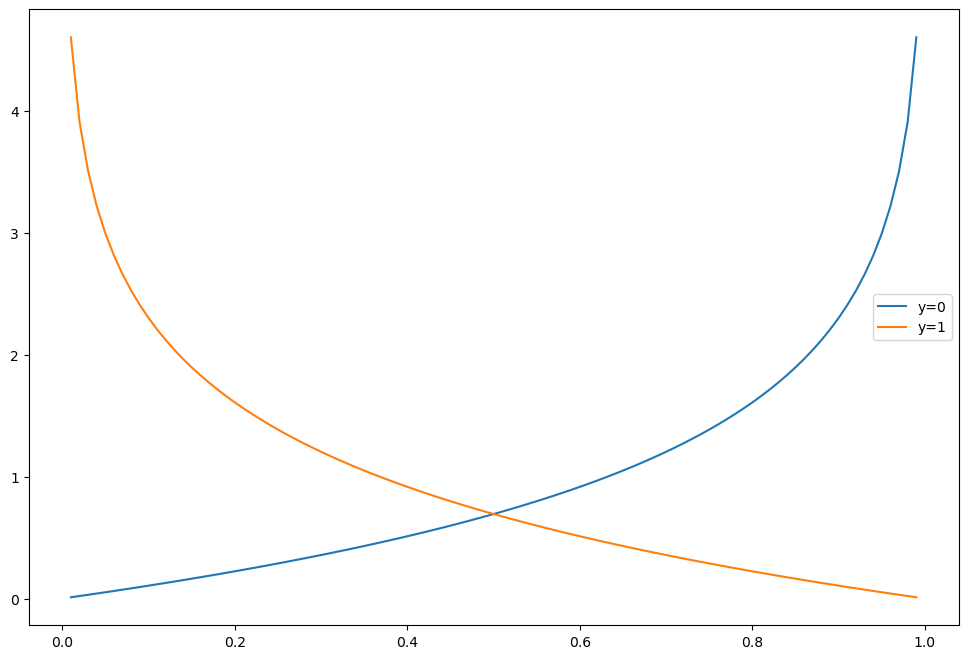

In [4]:
h = np.arange(0.01, 1, 0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h, C0, label = 'y=0')
plt.plot(h, C1, label = 'y=1')
plt.legend()

plt.show()

## Logistic Regression 실습

- 와인데이터 이용

In [5]:
# 데이터 받기

import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
           'master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
# 맛 등급 만들어 넣고 데이터 분리
from sklearn.model_selection import train_test_split

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [7]:
# 로지스틱 회귀 테스트

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver = 'liblinear', random_state = 13) # 회귀 선언, solver = 최적화 알고리즘 선택, 데이터 수가 적으면 liblinear 선택
lr.fit(X_train, y_train) # 학습

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7427361939580527
Test Accuracy:  0.7446153846153846


In [8]:
# 스케일러 적용하여 파이프라인 구축

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

estimators = [('scaler', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state=13))]

pipe = Pipeline(estimators)

In [9]:
# 파이프라인 학습

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=13, solver='liblinear'))])

In [10]:
# 파이프라인 정확도 확인

y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7444679622859341
Test Accuracy:  0.7469230769230769


In [11]:
# Decisiont Tree 와의 비교 작업 전 모델들 dictionary 화

from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth = 2, random_state = 13)
wine_tree.fit(X_train, y_train)

models = {
    'logistic regression':pipe, 
    'decision tree':wine_tree
}

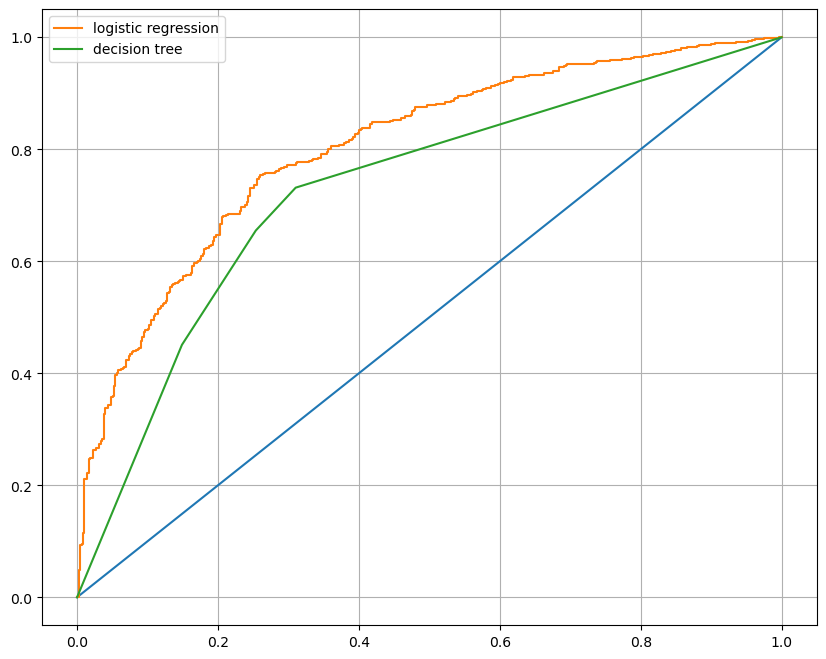

In [12]:
# AUC 그래프를 이용한 모델간 비교

from sklearn.metrics import roc_curve

plt.figure(figsize=(10,8))
plt.plot([0, 1], [0, 1]) # 0-1 완전 random인지 비교하기 위한 직선 생성
for model_name, model in models.items(): # dictionary로 저장하였으므로 모델 이름과 모델 함수를 불러오기 위해 for, .items() 사용
    pred = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.plot(fpr, tpr, label=model_name)

# line 8, 9, 10이 roc curve를 그리기 위해 필요한 내용임

plt.grid()
plt.legend()
plt.show()

* Logistic regression이 decision tree보다 좀 더 나은 성능을 보인다고 힌트를 얻을 수 있음

## PIMA 인디언 당뇨병 예측

In [13]:
# 데이터 읽기 및 데이터프레임 확인

import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/' + \
            'dataset/diabetes.csv'

PIMA = pd.read_csv(PIMA_url)

PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# 데이터 확인

PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# 전부 수치이기 때문에 float형으로 데이터타입 변환, 변환 후 정보 확인

PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


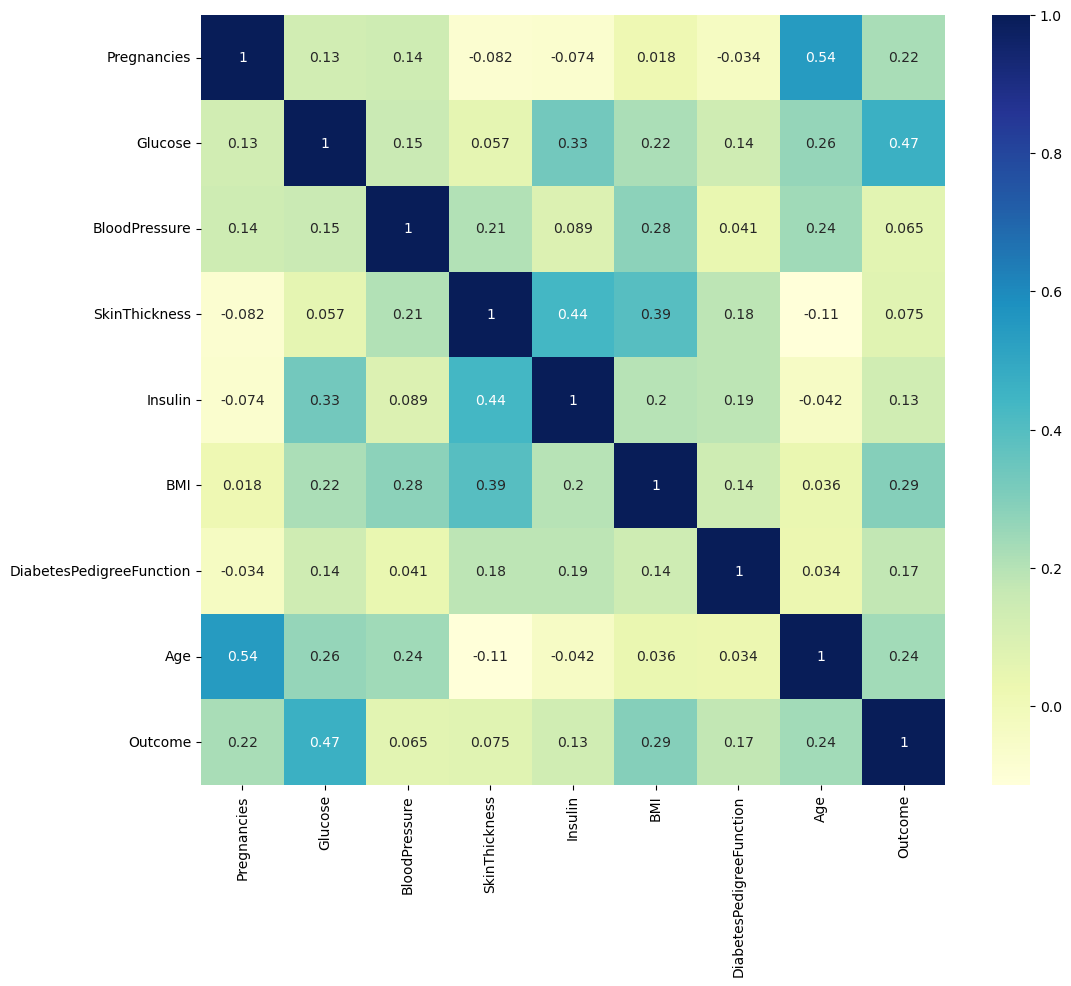

In [16]:
# 상관관계 확인

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(), cmap='YlGnBu', annot=True)
plt.show()

In [17]:
# 혈압이 0인 데이터가 존재함. >> 확인
# 1. 0과 일치하는 데이터 확인 >> True, False
# 2. int로 해당 boolean 변환시키면 True는 1, False는 0 반환
# 3. .sum() 이용하여 그러한 데이터가 몇 개 있는지 확인


(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [18]:
# 의학적 지식과 PIMA 인디언에 대한 정보가 없으므로
# glucose, bloodpressure, skinthickness, bmi 등 당장 0이면 이상한 수치들에 일단 mean 적용

zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

PIMA[zero_features] = PIMA[zero_features].replace(0, PIMA[zero_features].mean()) # 리스트에 해당 하는 열의 0 값 >> 각 열의 평균 값으로 교환

(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [19]:
# 데이터 분리

from sklearn.model_selection import train_test_split

X = PIMA.drop(['Outcome'], axis = 1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 13,
                                                    stratify = y) # 당뇨인 사람 / 아닌 사람의 비율 맞추기

In [20]:
# Pipeline 생성

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

estimators = [('scalar', StandardScaler()),
              ('clf', LogisticRegression(solver='liblinear', random_state = 13))]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [21]:
# 특성 수치 확인

from sklearn.metrics import (accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print('Accuracy : ', accuracy_score(y_test, pred))
print('Recall : ', recall_score(y_test, pred))
print('Precision : ', precision_score(y_test, pred))
print('AUC score : ', roc_auc_score(y_test, pred))
print('F1 score : ', f1_score(y_test, pred))

Accuracy :  0.7727272727272727
Recall :  0.6111111111111112
Precision :  0.7021276595744681
AUC score :  0.7355555555555556
F1 score :  0.6534653465346535


* 상대적 의미를 부여할 standard가 없기 때문에 위 수치 자체를 평가할 수 없음

In [22]:
# outcome을 제외하면 변수가 되는 열은 총 8개
# 위에서 만든 pipeline을 이용하여 다변수 방정식의 계수 값 확인

coeff = list(pipe_lr['clf'].coef_[0]) # pipeline의 clf 단계 coefficient 값 확인 >> .coef_는 중복 리스트 array 반환하므로 [0]을 이용하여 단일 리스트만 뽑아냄
                                      # list() 이용하여 array를 리스트로 변환
labels = list(X_train.columns)
labels, coeff

(['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 [0.354265888441265,
  1.2014244425037581,
  -0.15840135536286712,
  0.033946577129299556,
  -0.16286471953988127,
  0.6204045219895111,
  0.3666935579557874,
  0.1719596544703509])

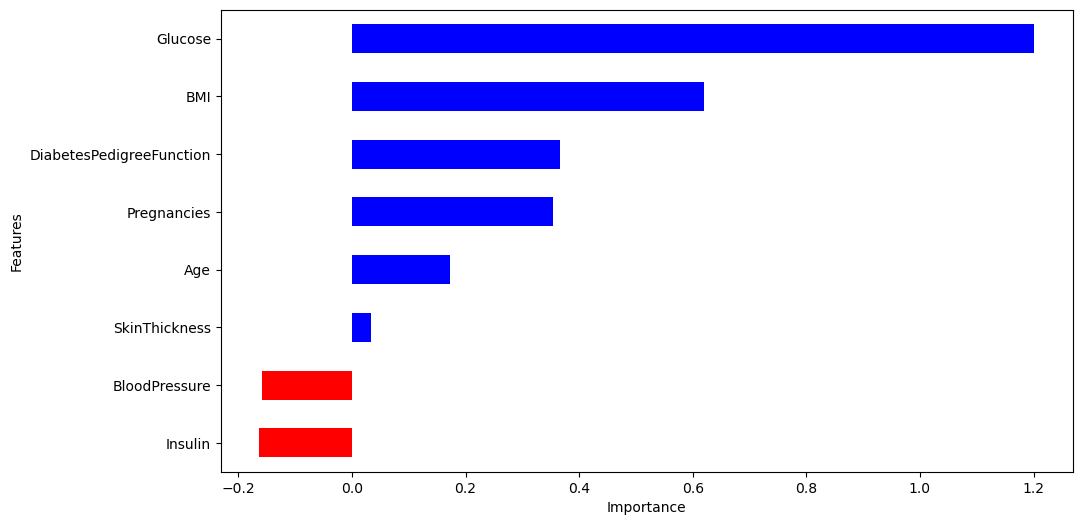

In [23]:
# 주요 feature 그래프화

features = pd.DataFrame({'Features':labels, 'importance':coeff}) # 위에서 만든 label과 coef 이용하여 데이터 프레임 생성
features.sort_values(by=['importance'], ascending = True, inplace = True) # 순서대로 나열

features['positive'] = features['importance'] > 0 # positive 열 생성, coef 값에 따라 true, false 반환
features.set_index('Features', inplace=True)  # features into index >> 그래프 y축 표현 쉽게하기 위함
features['importance'].plot(kind='barh', 
                            figsize=(11,6),
                            color=features['positive'].map({True:'blue',
                                                            False: 'red'})) # positive 열 이용하여 color mapping
plt.xlabel('Importance')
plt.show()

#### 해석

* 포도당, BMI는 당뇨에 미치는 정도가 다른 요인에 비해 높음
* 혈압과 insulin은 outcome에 대해 반비례적 요소
* 상관계수 상으로는 연령이 임신횟수나 당뇨 내력 가중치 보다 더 높은 연관성을 띄나, <br> 현재 만들어진 모델에서는 연령이 더 낮은 관련성을 띔

## 와인 데이터 이용한 정밀도 / 재현율 트레이드 오프

In [24]:
# 데이터 받고 맛 컬럼 생성, 데이터 분리

import pandas as pd
from sklearn.model_selection import train_test_split

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
           'master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 13)

In [25]:
# logistic regression 적용

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state = 13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Accuracy: ', accuracy_score(y_train, y_pred_tr))
print('Test Accuracy: ', accuracy_score(y_test, y_pred_test))

Train Accuracy:  0.7427361939580527
Test Accuracy:  0.7446153846153846


In [26]:
# classification report
# precision = 예측한 것들 중 해당 값인 확률 (eg. 1이라고 예측한 것들 중에 진짜 1들)
# recall = 실제 값 중 해당 값인 확률 (eg. 실제 0 중에서 0이라고 예측한 것)
# support = 분할 갯수

# macro avg = 해당 클래스 평균
# weighted avg = 분할 갯수를 가중치로 적용하여 구한 평균
# eg. 0.68*(477/1300) + 0.77*(823/1300)

from sklearn.metrics import classification_report

print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.57      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [27]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

#                          [prediction class]
#                         positive    negative
#  [Actual      positive   True P     False N
#   Class]      negative   False P     True P

array([[274, 203],
       [129, 694]], dtype=int64)

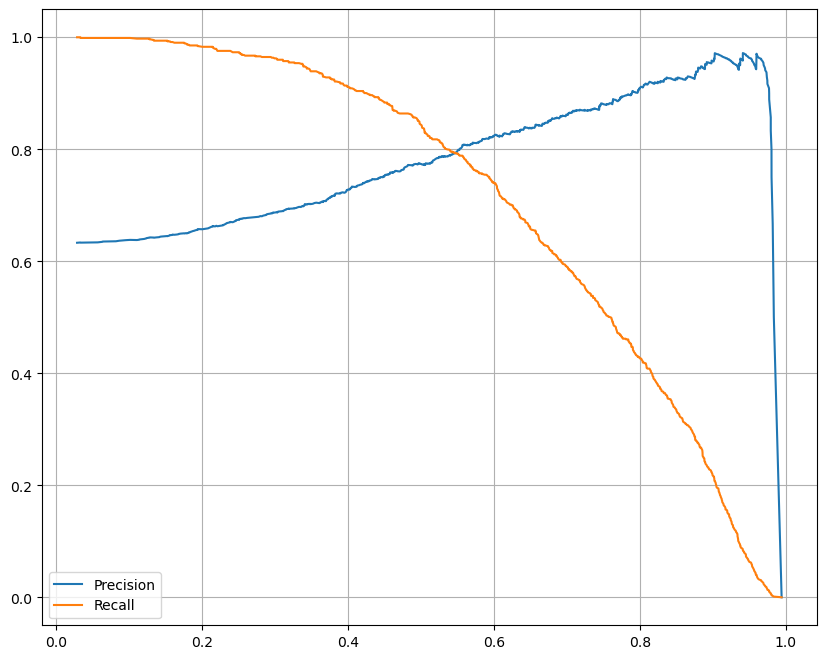

In [28]:
# Precision-Recall curve

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10,8))
pred = lr.predict_proba(X_test)[:, 1] # 해당 모델에서 0, 1 중 1인 확률 확인
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)
plt.plot(thresholds, precisions[:len(thresholds)], label='Precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='Recall')
plt.grid()
plt.legend()
plt.show()

In [29]:
# threshold 조정 전 3개 확률 확인

pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40483176, 0.59516824],
       [0.51155372, 0.48844628],
       [0.1009989 , 0.8990011 ]])

In [30]:
# 검증 데이터 확률 옆에 예측한 값 놓기
# pred_proba는 이미 array 형식이므로, y_pred_test의 형태를 열로 바꾸는 과정

import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis =1)

array([[0.40483176, 0.59516824, 1.        ],
       [0.51155372, 0.48844628, 0.        ],
       [0.1009989 , 0.8990011 , 1.        ],
       ...,
       [0.22465625, 0.77534375, 1.        ],
       [0.67102028, 0.32897972, 0.        ],
       [0.31526955, 0.68473045, 1.        ]])

In [31]:
# threshold 변경
# binarizer >> Binarize data (set feature values to 0 or 1) according to a threshold.

from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold = 0.6).fit(pred_proba)
pred_bin = binarizer.transform(pred_proba)[:, 1] # 1에 대한 내용
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [32]:
# Classification report 재진행

print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.83      0.74      0.78       823

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.73      1300
weighted avg       0.75      0.74      0.74      1300



* 이런식으로 threshold 임의 조정은 가능하지만 주로 쓰이는 방식은 아닌 것 인지할 것
* threshold를 변경함으로 인해 어떤 요소들이 변경되는지 정확히 인지하고 그것이 편향성을 부여하지 않으며 목적을 달성할 때 사용하는 것이 낫다고 판단됨.

## 앙상블 기법

In [33]:
# 데이터 읽기 (1) - 컬럼 이름 먼저 가져오기 (feature가 561개임)

import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
      'master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep='\s+', header = None, # txt 파일에 index, name이 1개 혹은 그 이상의 공백으로 나눠져 있어 sep 조건을 저렇게 거는 것
                              names=['column_index', 'column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [34]:
# 컬럼 이름만 리스트화
# .tolist() 없으면 array 반환함

feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [35]:
# X 데이터 불러오기, 해당 데이터만해도 크기가 63MB로 크기 때문에..
# pd.read_csv >> 해당 데이터를 데이터 프레임으로 저장

X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
              'master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
             'master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep='\s+', header=None)
X_test = pd.read_csv(X_test_url, sep='\s+', header=None)

In [36]:
# X 데이터에 컬럼 이름 부여

X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [37]:
# Y 데이터 불러오기 및 이름 부여
# Y 는 답이므로 행동이 컬럼 이름으로 부여됨

y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
              'master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/' + \
             'master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep='\s+', header=None, names=['action'])
y_test = pd.read_csv(y_test_url, sep='\s+', header=None, names=['action'])

In [38]:
# 불러온 데이터 형태 확인 (행렬)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

In [39]:
# 훈련용 Y 데이터 액션별 수 확인
# 1. walking
# 2. walking upstairs
# 3. walking downstairs
# 4. sitting
# 5. standing
# 6. laying

y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [40]:
# Decision tree 적용

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state = 13, max_depth = 4)

dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)

0.8096369189005769

In [41]:
# GridSearch CV 사용

from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid = params, scoring = 'accuracy',
                       cv = 5, return_train_score=True)

grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=4, random_state=13),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [42]:
grid_cv.best_score_, grid_cv.best_params_

(0.8543335321892183, {'max_depth': 8})

In [43]:
# max_depth 별 성능을 표로 정리

cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843444,0.944879
1,8,0.854334,0.982692
2,10,0.847125,0.993369
3,12,0.841958,0.997212
4,16,0.841958,0.999660
5,20,0.842365,0.999966
6,24,0.841821,1.000000


In [44]:
# 실제 test 데이터에서의 결과 확인 (accuracy)

max_depths = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state = 13)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_depth =', depth, ', Accuracy =', accuracy)

Max_depth = 6 , Accuracy = 0.8554462164913471
Max_depth = 8 , Accuracy = 0.8734306073973532
Max_depth = 10 , Accuracy = 0.8615541228367831
Max_depth = 12 , Accuracy = 0.8595181540549711
Max_depth = 16 , Accuracy = 0.8669833729216152
Max_depth = 20 , Accuracy = 0.8652867322701052
Max_depth = 24 , Accuracy = 0.8652867322701052


In [45]:
# gridsearch CV를 이용해 accuracy 확인하는 방법

# 1. best estimator 할당
# 2. 해당 estimator로 예측
# 3. 실제 값과 예측 값 비교 출력

best_dt_clf = grid_cv.best_estimator_
pred1 = best_dt_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

### Random Forest 적용

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6, 8, 10],        # max_depth 설정
    'n_estimators' : [50, 100, 200], # 사용할 decision tree 갯수 설정
    'min_samples_leaf' : [8, 12],    # 분할된 결과가 가질 최소 샘플 수 결정 (분할 후 샘플 수)
    'min_samples_split' : [8, 12]    # 분할하기 위한 최소 샘플 수 결정 (분할 전 샘플 수)
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)  # n_jobs >> 작업에 사용할 cpu 갯수 (-1 >> 전부 사용)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs = -1) # 위에서 정한 다양한 parameter 적용을 위해 GridSearchCV 사용
grid_cv.fit(X_train, y_train)

c:\Users\User\miniconda3\envs\ds_study\lib\site-packages\sklearn\model_selection\_search.py:910: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200]})

In [47]:
# 결과 정리 (1) >> 결과 데이터 프레임화

cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [48]:
# 결과 정리 (2) >> 원하는 결과만 뽑아서 보기

target_col = ['rank_test_score', 'mean_test_score', 'param_n_estimators', 'param_max_depth'] # 순서대로, 성능 랭크 / test score 평균 / 사용된 estimator 수 / max_depth

cv_results_df[target_col].sort_values('rank_test_score').head() # 원하는 결과만 뽑아서 랭크 순으로 확인


,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.915125,100,10
25,1,0.915125,100,10
23,3,0.912813,200,8
20,3,0.912813,200,8
35,5,0.912541,200,10


* 위에서 test_score는 validation score임 [train data에 대한 KFold 검증 결과 값이므로, 해당 parameter를 사용하여 test data에 적용한 값이 추가로 필요]

In [49]:
# 결과 정리 (3) >> best 모델 확인

grid_cv.best_params_, grid_cv.best_score_

({'max_depth': 10,
  'min_samples_leaf': 8,
  'min_samples_split': 8,
  'n_estimators': 100},
 0.9151251360174102)

In [50]:
# best 모델 적용하여 accuracy 확인

rf_clf_best = grid_cv.best_estimator_ # rf_clf_best 에 best 모델의 parameter 저장
rf_clf_best.fit(X_train, y_train)     # 해당 parameter와 estimator 이용하여 정보 학습

pred = rf_clf_best.predict(X_test)    # X_test 값을 가지고 예측
accuracy_score(y_test, pred)          # y_test 값과 예측한 결과 대조

C:\Users\User\AppData\Local\Temp\ipykernel_8012\779916697.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf_best.fit(X_train, y_train)     # 해당 parameter와 estimator 이용하여 정보 학습


0.9205972175093315

### 중요 특성 추출

In [51]:
best_cols_values = rf_clf_best.feature_importances_  # 최적화 시킨 모델에서 561개의 특성의 중요도 가져오기 >> array 반환
best_cols = pd.Series(best_cols_values, index=X_train.columns)  # 위 값을 series 형태로 만들기 (이름은 기존 데이터 열에서 가져옴)

top20_cols = best_cols.sort_values(ascending=False)[:20] # 상위 20개만 추출
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

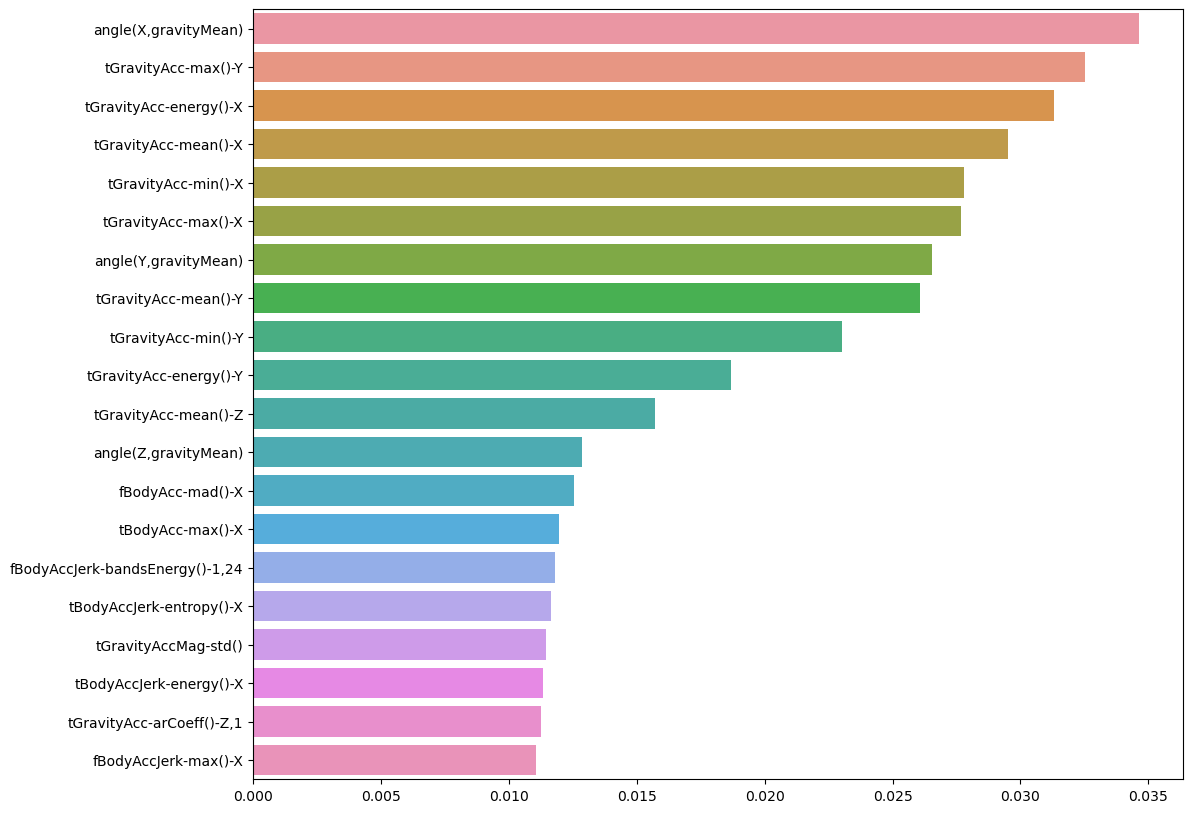

In [53]:
# 위 특성 그래프화

import seaborn as sns

plt.figure(figsize=(12,10))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

In [63]:
# 중요도 상위 20개의 특성만 이용하여 다시 성능 확인
# >> 정확도를 어느 정도 포기하고 연산 속도를 높일 것인지 등등...

X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

rf_clf_best_re = grid_cv.best_estimator_    # 위에서 최적화 하였던 paramter 가져오기
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))  # 결과 값의 모양을 변경하는 이유는 DataConversionWarning 때문임

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249

In [61]:
y_train

,action
0,5
1,5
2,5
3,5
4,5
...,...
7347,2
7348,2
7349,2
7350,2


In [62]:
y_train.values

array([[5],
       [5],
       [5],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [57]:
y_train.values.reshape(-1,)

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)